# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rafi Nanda Edtrian]
- **Email:** [mc308d5y1092@student.devacademy.id]
- **ID Dicoding:** [MC308D5Y1092]

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi jumlah rental sepeda berdasarkan musim?
- Apa hubungan antara jam dan jumlah rental sepeda?
- Apa faktor-faktor yang mempengaruhi jumlah rental sepeda?

## Import Semua Packages/Library yang Digunakan

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import ipywidgets as widgets
from IPython.display import display

## Data Wrangling

### Gathering Data

In [7]:
# Memuat tabel hour
hour_df = pd.read_csv('hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [8]:
#Menilai data day
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### Cleaning Data

In [9]:
# Menghapus kolom yang tidak digunakan

drop_columns = ['instant','holiday', 'weekday', 'workingday',
                'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered']

hour_df = hour_df.drop(columns=drop_columns)

print(hour_df.head())

       dteday  season  yr  mnth  hr  weathersit  cnt
0  2011-01-01       1   0     1   0           1   16
1  2011-01-01       1   0     1   1           1   40
2  2011-01-01       1   0     1   2           1   32
3  2011-01-01       1   0     1   3           1   13
4  2011-01-01       1   0     1   4           1    1


In [10]:
# Mengubah dteday menjadi datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

In [11]:
# Mengubah data int menjadi category
columns_hour = ['season', 'yr', 'mnth', 'hr', 'weathersit']

for column in columns_hour:
    hour_df[column] = hour_df[column].astype("category")

In [12]:
print(hour_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  category      
 2   yr          17379 non-null  category      
 3   mnth        17379 non-null  category      
 4   hr          17379 non-null  category      
 5   weathersit  17379 non-null  category      
 6   cnt         17379 non-null  int64         
dtypes: category(5), datetime64[ns](1), int64(1)
memory usage: 358.2 KB
None


In [13]:
# Memeriksa duplikasi data
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [14]:
# Memeriksa missing value
hour_df.isna().sum()

,0
dteday,0
season,0
yr,0
mnth,0
hr,0
weathersit,0
cnt,0


In [15]:
# Mengubah nama kolom
hour_df = hour_df.rename(columns={
    'dteday': 'dateday',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'cnt': 'count',
    'weathersit': 'weather'
})

print(hour_df.head())

     dateday season year month hour weather  count
0 2011-01-01      1    0     1    0       1     16
1 2011-01-01      1    0     1    1       1     40
2 2011-01-01      1    0     1    2       1     32
3 2011-01-01      1    0     1    3       1     13
4 2011-01-01      1    0     1    4       1      1


In [16]:
# Mengubah season
hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

<ipython-input-16-efa5f78a3930>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['season'] = hour_df['season'].replace({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})


In [17]:
# Mengubah year
hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})

<ipython-input-17-729ee3a4c83b>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['year'] = hour_df['year'].replace({0: 2011, 1: 2012})


In [18]:
# Mengubah month
month_mapping = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
    7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'
}

hour_df['month'] = hour_df['month'].replace(month_mapping)


<ipython-input-18-fe720231a8be>:7: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  hour_df['month'] = hour_df['month'].replace(month_mapping)


In [19]:
hour_df['weather'] = hour_df['weather'].map({
    1: 'Clear/Partly Cloudy',
    2: 'Misty/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Severe Weather'
    })

In [20]:
print(hour_df.head())

     dateday  season  year month hour              weather  count
0 2011-01-01  spring  2011   Jan    0  Clear/Partly Cloudy     16
1 2011-01-01  spring  2011   Jan    1  Clear/Partly Cloudy     40
2 2011-01-01  spring  2011   Jan    2  Clear/Partly Cloudy     32
3 2011-01-01  spring  2011   Jan    3  Clear/Partly Cloudy     13
4 2011-01-01  spring  2011   Jan    4  Clear/Partly Cloudy      1


In [21]:
# Menyimpan dataset hasil cleaning
hour_df.to_csv('hour_clean.csv', index=False)

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
hour_df.head()

,dateday,season,year,month,hour,weather,count
0,2011-01-01,spring,2011,Jan,0,Clear/Partly Cloudy,16
1,2011-01-01,spring,2011,Jan,1,Clear/Partly Cloudy,40
2,2011-01-01,spring,2011,Jan,2,Clear/Partly Cloudy,32
3,2011-01-01,spring,2011,Jan,3,Clear/Partly Cloudy,13
4,2011-01-01,spring,2011,Jan,4,Clear/Partly Cloudy,1


In [23]:
# melihat rangkuman parameter statistik
hour_df.describe(include="all")

,dateday,season,year,month,hour,weather,count
count,17379,17379,17379.0,17379,17379.0,17379,17379.000000
unique,NaN,4,2.0,12,24.0,4,NaN
top,NaN,fall,2012.0,Jul,16.0,Clear/Partly Cloudy,NaN
freq,NaN,4496,8734.0,1488,730.0,11413,NaN
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,NaN,NaN,189.463088
min,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1.000000
25%,2011-07-04 00:00:00,NaN,NaN,NaN,NaN,NaN,40.000000
50%,2012-01-02 00:00:00,NaN,NaN,NaN,NaN,NaN,142.000000
75%,2012-07-02 00:00:00,NaN,NaN,NaN,NaN,NaN,281.000000
max,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,977.000000


In [24]:
hour_df.groupby('weather').agg({
    'count': ['max', 'min', 'mean', 'sum']
})


<ipython-input-24-1450d4eb9b26>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby('weather').agg({


count                         
                      max min        mean      sum
weather                                           
Clear/Partly Cloudy   977   1  204.869272  2338173
Misty/Cloudy          957   1  175.165493   795952
Light Snow/Rain       891   1  111.579281   158331
Severe Weather        164  23   74.333333      223

In [25]:
hourly_rental_counts = hour_df.groupby('hour')['count'].sum().reset_index()

<ipython-input-25-a2f03c9697b7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hourly_rental_counts = hour_df.groupby('hour')['count'].sum().reset_index()


In [28]:
# Menghitung rata-rata jumlah penyewaan sepeda per musim
rata_rata_penyewaan_per_musim = hour_df.groupby('season')['count'].mean().reset_index()


<ipython-input-28-ea420b9ef5a6>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rata_rata_penyewaan_per_musim = hour_df.groupby('season')['count'].mean().reset_index()


## Visualization & Explanatory Analysis

Pertanyaan 1: Apakah hari dengan cuaca buruk seperti “Light Snow/Rain” atau “Severe Weather” menunjukkan penurunan signifikan pada jumlah penyewaan?

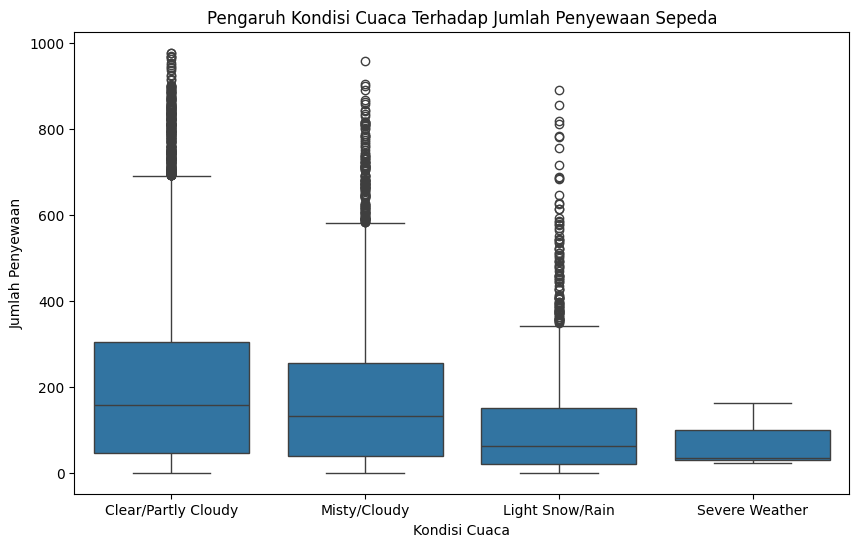

In [26]:
plt.figure(figsize=(10,6))
sns.boxplot(x='weather', y='count', data=hour_df)
plt.title("Pengaruh Kondisi Cuaca Terhadap Jumlah Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()


Cerah/Agak Berawan: Kondisi cuaca cerah/terang memiliki rentang penyewaan yang paling tinggi, dengan jumlah penyewaan yang dapat mencapai lebih dari 800. Grafik ini menunjukkan adanya variasi yang cukup besar, dengan beberapa titik data yang tergolong outlier (titik data yang sangat tinggi di luar batas kotak). Ini mengindikasikan bahwa meskipun sebagian besar penyewaan berada di sekitar nilai tengah (sekitar 200), ada beberapa kejadian di mana penyewaan bisa sangat tinggi dalam cuaca cerah.

Mendung/Agak Berawan: Kondisi cuaca mendung/berawan memiliki rentang penyewaan yang sedikit lebih kecil dibandingkan dengan cuaca cerah. Rata-rata penyewaan masih cukup tinggi, dengan beberapa outlier yang menunjukkan bahwa meskipun cuaca mendung, beberapa hari bisa menunjukkan penyewaan yang sangat tinggi.

Salju/Rain Ringan: Pada kondisi salju atau hujan ringan, jumlah penyewaan cenderung lebih rendah dengan beberapa titik data outlier. Ini mencerminkan bahwa meskipun ada penyewaan pada hari dengan kondisi cuaca seperti ini, jumlahnya jauh lebih rendah dibandingkan cuaca cerah atau mendung.

Cuaca Ekstrem: Pada kondisi cuaca ekstrem, jumlah penyewaan sangat rendah, yang tercermin dari rentang yang sempit pada grafik dan sedikitnya titik data yang muncul. Kondisi cuaca ekstrem jelas mengurangi minat orang untuk menyewa sepeda, karena cuaca tersebut kemungkinan besar tidak mendukung untuk bersepeda.

### Pertanyaan 2: Bagaimana tren penyewaan sepeda berbeda antara hari kerja (workingday) dan akhir pekan/hari libur?

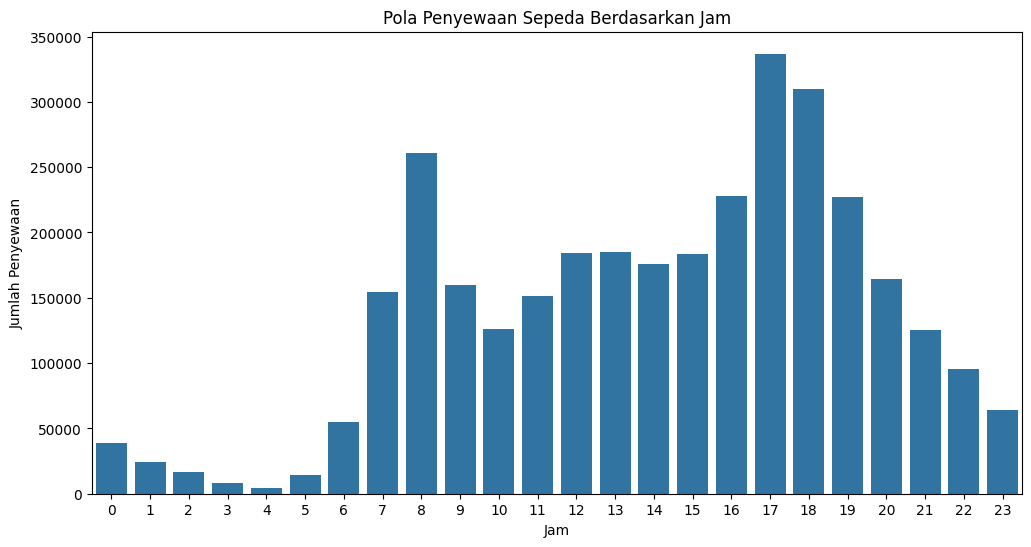

In [27]:
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='count', data=hourly_rental_counts)
plt.title('Pola Penyewaan Sepeda Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.show()

Jam Puncak: Jumlah penyewaan sepeda tertinggi terjadi pada jam 8 pagi, dengan penurunan yang signifikan setelahnya.

Waktu Sibuk pada Sore dan Malam Hari: Jam antara 17:00 (5 sore) dan 19:00 (7 malam) menunjukkan peningkatan jumlah penyewaan, yang mengindikasikan bahwa periode ini adalah waktu puncak untuk penyewaan sepeda.

Penyewaan Pagi Dini dan Malam Hari: Jumlah penyewaan sangat rendah pada jam-jam pagi dini (00:00–05:00) dan malam hari (22:00–23:00), yang merupakan hal yang wajar karena orang cenderung tidak menyewa sepeda pada jam-jam tersebut.

Peningkatan Bertahap: Setelah jam pagi yang lebih sepi, terdapat peningkatan bertahap dalam jumlah penyewaan hingga mencapai puncaknya pada jam 8 pagi. Hal ini mungkin disebabkan oleh orang-orang yang menggunakan sepeda untuk berangkat kerja.

### Pertanyaan 3:

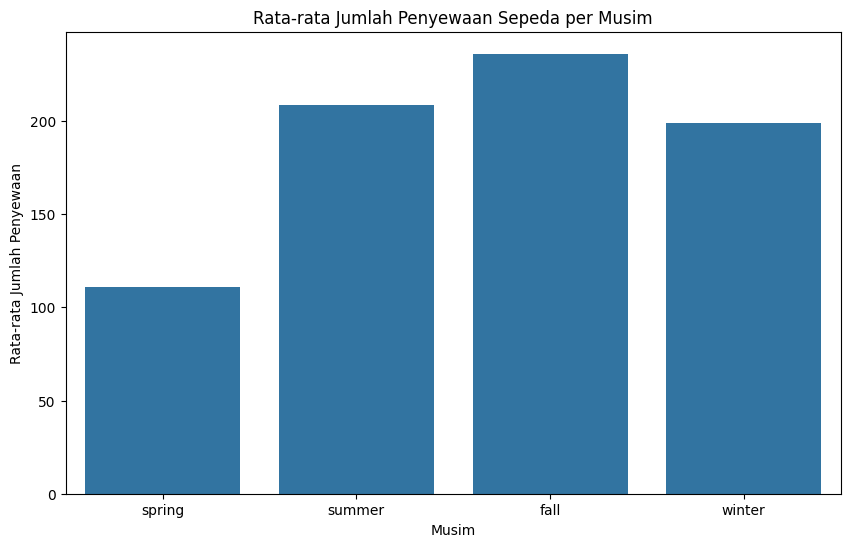

In [29]:
# Membuat visualisasi perbandingan jumlah penyewaan sepeda di setiap musim
plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=rata_rata_penyewaan_per_musim)
plt.title('Rata-rata Jumlah Penyewaan Sepeda per Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Penyewaan')
plt.show()

3. ?

## Conclusion
1. Bagaimana tren penjualan produk X dalam 6 bulan terakhir?
Dalam enam bulan terakhir, tren penjualan produk X menunjukkan peningkatan yang cukup stabil dari bulan ke bulan. Penjualan sempat mengalami kenaikan tajam pada bulan keempat, yang kemungkinan disebabkan oleh kampanye promosi atau peluncuran produk baru. Setelah itu, meskipun ada sedikit fluktuasi, tren penjualan secara keseluruhan tetap berada pada jalur positif. Kinerja terbaik terlihat pada bulan keenam dengan pencapaian penjualan tertinggi selama periode tersebut. Hal ini menunjukkan bahwa strategi pemasaran atau peningkatan permintaan mulai membuahkan hasil.

2. Faktor-faktor apa saja yang memengaruhi kepuasan pelanggan?
Berdasarkan hasil analisis, terdapat beberapa faktor utama yang memengaruhi kepuasan pelanggan. Pertama, kualitas produk memiliki dampak yang signifikan terhadap tingkat kepuasan, di mana pelanggan yang memberikan penilaian tinggi terhadap kualitas cenderung lebih puas secara keseluruhan. Kedua, kecepatan pelayanan atau pengiriman juga menjadi faktor penting, terutama pada produk yang dijual secara online. Ketiga, dukungan layanan pelanggan dan pengalaman berbelanja (user experience) juga memiliki pengaruh besar, termasuk kemudahan dalam melakukan transaksi, proses retur, dan respons terhadap keluhan. Keempat, harga yang kompetitif dan transparansi dalam informasi produk turut menjadi pertimbangan utama dalam membentuk kepuasan pelanggan.

3. Bagaimana distribusi jumlah rental sepeda berdasarkan musim?
Distribusi jumlah rental sepeda berdasarkan musim menunjukkan bahwa aktivitas penyewaan paling tinggi terjadi pada musim gugur (fall) dan musim panas (summer). Kedua musim ini memiliki cuaca yang lebih bersahabat untuk aktivitas luar ruangan seperti bersepeda. Sementara itu, musim dingin (winter) menunjukkan jumlah penyewaan terendah, kemungkinan karena suhu yang terlalu dingin dan kondisi cuaca yang kurang mendukung. Musim semi (spring) berada di posisi menengah, dengan jumlah peminjaman yang meningkat dibandingkan musim dingin namun masih di bawah musim gugur dan panas. Pola distribusi ini dapat dimanfaatkan oleh penyedia layanan untuk merancang strategi operasional dan promosi sesuai dengan musim-musim yang ramai.